### Good links:

https://habrahabr.ru/company/wunderfund/blog/316826/

http://quasiben.github.io/dfwmeetup_2014/#/22


### Run notebook on server and connect to them

In [2]:
cat others/jup.sh

cat: other/jup.sh: No such file or directory


In [3]:
%%bash
pip install wordcloud
pip install tqdm
pip install plotly
pip install plotly --upgrade
pip install pandas-datareader
pip install cufflinks
pip install qgrid

  Running setup.py bdist_wheel for wordcloud: started
  Running setup.py bdist_wheel for wordcloud: finished with status 'done'
  Stored in directory: /home/dkuzin/.cache/pip/wheels/d9/4c/ac/e63c45f2ce09860e9459a410953039c30296e89d9f7234675f
Successfully built wordcloud
  Running setup.py bdist_wheel for plotly: started
  Running setup.py bdist_wheel for plotly: finished with status 'done'
  Stored in directory: /home/dkuzin/.cache/pip/wheels/be/f1/88/edfe7e35fe42d192427ee868b952dd1af761367aceffb78e54
Successfully built plotly
Requirement already up-to-date: plotly in /home/dkuzin/apps/anaconda3/lib/python3.6/site-packages
Requirement already up-to-date: nbformat>=4.2 in /home/dkuzin/apps/anaconda3/lib/python3.6/site-packages (from plotly)
Requirement already up-to-date: six in /home/dkuzin/apps/anaconda3/lib/python3.6/site-packages (from plotly)
Requirement already up-to-date: pytz in /home/dkuzin/apps/anaconda3/lib/python3.6/site-packages (from plotly)
Requirement already up-to-date:

### Magic commands

### Widgets
https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html

In [4]:
from __future__ import print_function
from IPython.display import display
import ipywidgets as widgets

In [5]:
#button
button = widgets.Button(description="Click Me!")
display(button)

def on_button_clicked(b):
    print("Button clicked.")

button.on_click(on_button_clicked)

Button clicked.


In [6]:
#text submission
text = widgets.Text()
display(text)

def handle_submit(sender):
    print(text.value)

text.on_submit(handle_submit)

123


In [7]:
#select value
int_range = widgets.IntSlider()
display(int_range)

def on_value_change(change):
    print(change['new'], end = ',')

int_range.observe(on_value_change, names='value')

2,13,18,27,30,

In [8]:
#progress bar
widgets.FloatProgress(
    value=7.799,
    min=0,
    max=10.0,
    step=0.1,
    description='Loading:',
    bar_style='info',
    orientation='horizontal'
)

In [9]:
#linked widgets
a = widgets.FloatText()
b = widgets.FloatSlider()
display(a,b)

mylink = widgets.jslink((a, 'value'), (b, 'value'))

In [10]:
#interaction
def f(a, b):
    return a+b

w = widgets.interactive(f, a=10, b=20)

In [11]:
display(w);

In [12]:
print(w.kwargs)
print(w.result)

{'a': 10, 'b': 20}
30


### WordCloud

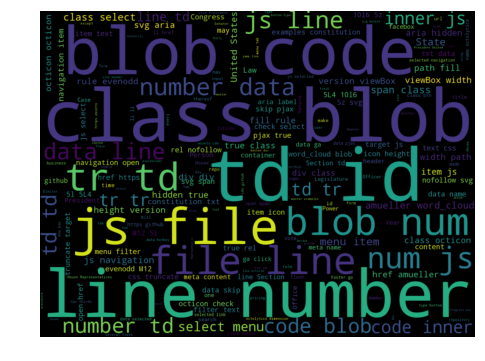

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = open('others/constitution.txt').read()

wordcloud = WordCloud(width=1440, height=1080).generate(text)
plt.figure(figsize=(9,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Progress Bar

In [17]:
#in case you don't want to show additional output
# (it is suitable for python/iPython)
from tqdm import tqdm
import time
trash = [time.sleep(0.1) for i in tqdm(range(100))]

100%|██████████| 100/100 [00:10<00:00,  9.83it/s]


In [18]:
#if you wish to show additional info and you are working in Jupyter Notebook
from tqdm import tqdm_notebook

for i in tqdm_notebook(range(100)):
    print(i, end=",")
    time.sleep(0.1)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,


In [20]:
from tqdm import tnrange, tqdm_notebook
for i in tnrange(5, desc='1st loop'):
    for j in tqdm_notebook(range(100), desc='2nd loop'):
        time.sleep(0.01)

### Plotly

In [21]:
from plotly.offline import init_notebook_mode, iplot

In [22]:
init_notebook_mode(connected = True)

In [23]:
iplot([{'x' : [1,2,3], 'y' : [3,6,1]}])

In [24]:
from plotly.graph_objs import *
import numpy as np

In [25]:
iplot([Box(y = np.random.randn(50), showlegend=False) for i in range(45)], show_link=False)

In [26]:
x = np.random.randn(2000)
y = np.random.randn(2000)
iplot([Histogram2dContour(x=x, y=y, contours=Contours(coloring='heatmap')), 
       Scatter(x=x,y=y,mode='markers', marker=Marker(color='white', size=3,opacity=0.3))])

In [27]:
import cufflinks as cf
iplot(cf.datagen.lines().iplot(asFigure=True,
                              kind='scatter',xTitle='Dates',yTitle='Returns',title='Returns'))

### Dataframes

In [28]:
import pandas as pd
import numpy as np
randn = np.random.randn

pd.set_option('display.max_rows',8)

from pandas_datareader.data import get_data_yahoo

#get stock price data
spy = get_data_yahoo(symbols='SPY',
    start = pd.Timestamp('2011-01-01'),
    end = pd.Timestamp('2014-01-01'),
    adjust_price = True)

spy.head(5)

RemoteDataError: Unable to read URL: https://query1.finance.yahoo.com/v7/finance/download/SPY?period1=1293829200&period2=1388606399&interval=1d&events=history&crumb=bb%5Cu002FUIxf53CS

In [ ]:
import qgrid
qgrid.nbinstall(overwrite=True)
qgrid.show_grid(spy)

### cProfile (read binary file)

In [ ]:
#how to get stats:
python -m cProfile -o output.file item2vec_threading.py

import pstats
p = pstats.Stats('/home/dkuzin/Downloads/profile')
summary = p.sort_stats('cumulative')
_=summary.print_stats(30)

## using R magic function in Jupyter notebook

install rpy2: 
conda install rpy2

install R: https://www.digitalocean.com/community/tutorials/how-to-install-r-on-ubuntu-16-04-2

**other approaches:** https://people.duke.edu/~ccc14/sta-663/UsingPandas.html#using-r-from-ipython

** - example 1**

In [1]:
import rpy2
%load_ext rpy2.ipython
import pandas as pd
import numpy as np
data = np.random.randn(50000, 1)
df = pd.DataFrame(data, columns=["value"])

In [3]:
%%R
require("ggplot2")
plot_gg <- function(df) {
    p <- ggplot2(data=df) + geom_line(aes(x=A, y=B))
    print(p)
}

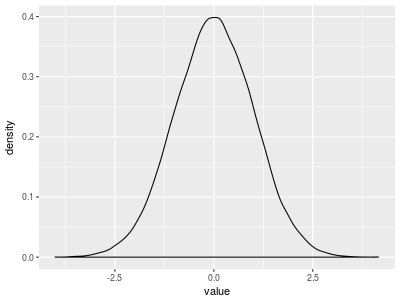

In [5]:
%%R -i df -w 400 -h 300 -u px
library(ggplot2)
ggplot(df) + geom_density(aes(x=value))

** - example 2**

In [6]:
df1 = pd.DataFrame({"A": [1, 2, 3], "B": [1, 2, 3]})
df2 = pd.DataFrame({"A": [3, 2, 1], "B": [1, 2, 3]})

In [20]:
%%R
plot_gg <- function(df) {
    p <- ggplot(data=df) + geom_line(aes(x=A, y=B))
    print(p)
}

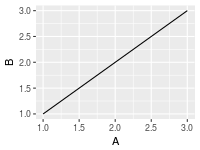

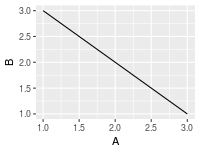

In [27]:
for df in df1, df2:
    #%Rpush df
    %R -i df -w 200 -h 150 -u px plot_gg(df)

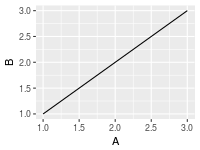

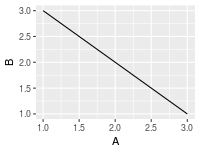

In [28]:
for df in df1, df2:
    %Rpush df
    %R -w 200 -h 150 -u px plot_gg(df)

** - example 3**

In [38]:
n = 1000
status = np.random.choice([0,1], n )
genotype = np.random.choice([0,1,2], (n,4))
genotype[status==0] = np.random.choice([0,1,2], (sum(status==0), 4), p=[0.33, 0.33, 0.34])
genotype[status==1] = np.random.choice([0,1,2], (sum(status==1), 4), p=[0.2, 0.3, 0.5])
df = pd.DataFrame(np.hstack([status[:, np.newaxis], genotype]), columns=['status', 'SNP1', 'SNP2', 'SNP3', 'SNP4'])
df.head(6)

status  SNP1  SNP2  SNP3  SNP4
0       1     2     1     1     2
1       0     0     2     1     1
2       0     2     0     0     1
3       1     1     0     2     2
4       0     0     1     1     1
5       0     0     2     1     2

In [39]:
%%R -i df,status -o fit

fit <- glm(status ~ ., data=df)
print(summary(fit))
print(fit$null.deviance - fit$deviance)
print(fit$df.null - fit$df.residual)
with(fit, pchisq(null.deviance - deviance, df.null - df.residual, lower.tail = FALSE))


Call:
glm(formula = status ~ ., data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8473  -0.4363   0.1527   0.4309   0.8927  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.02522    0.04312   0.585    0.559    
SNP1         0.11405    0.01804   6.324 3.85e-10 ***
SNP2         0.08209    0.01864   4.405 1.17e-05 ***
SNP3         0.11785    0.01857   6.347 3.33e-10 ***
SNP4         0.09707    0.01846   5.259 1.77e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.2197695)

    Null deviance: 250.00  on 999  degrees of freedom
Residual deviance: 218.67  on 995  degrees of freedom
AIC: 1329.7

Number of Fisher Scoring iterations: 2

[1] 31.32535
[1] 4
[1] 2.62743e-06


## using Perl

In [36]:
%%perl
use strict;
use warnings;

print "Hello World!\n";

Hello World!


## using  JAVA

https://github.com/twosigma/beakerx
    
https://github.com/twosigma/beakerx/blob/master/doc/contents/javaTutorial.ipynb

## using JS